In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

76.5046687923645 -83.73907632434667
-1.2501547602592495 42.31580565969318
65.46359655988903 126.10024690050955
-4.316383631271151 -116.89296368738562
74.22257143153374 133.7709409284687
29.662384266563492 -54.03885464523236
-88.65889333136744 172.8057895996863
-17.566860845686904 113.90438274848674
60.37847683249399 -4.889579639753009
24.346367996811452 92.7621247083996
-84.9481309438906 -89.41314699246979
62.91193540382383 -138.82475016055463
-11.127663835091397 91.02850771190339
-37.94715188422965 136.8473075421917
-33.83039640467155 -167.3191768741787
-66.68240132479733 -86.97424617026932
72.59045415142765 177.9402837570077
-11.507370528171052 -78.79541113680006
-52.888039385926895 64.01591867956569
-66.28122814015651 -149.84924873008904
11.119666075873951 -131.6327495314696
-69.36329785548925 -165.92505259903777
-55.15876185761112 48.44728427193476
-33.94971121479662 137.42537975200855
-63.80107252818177 64.97383160892363
37.979624394038154 -155.02528387957256
-81.56276192743802 0.

15.309995760903405 -32.655461292020675
55.31272058833386 -174.41447159178875
9.17874324548663 44.13542286352134
-49.99505242782635 38.96734429792329
-46.47139068878677 -92.15479086818254
35.83018531510936 90.72203767209481
-43.52586232175837 -119.03342639316165
-77.27628923261122 47.41210707189276
-40.301285200724585 -53.1389885922037
-70.05202091265282 -1.7519805909050774
77.07252333406234 -149.4823518918102
-30.112879730021717 164.1594204551957
-79.07917898013169 119.40113779303306
3.0990673964391107 169.05506497937637
-26.839967818146874 -148.1722112002019
71.48353113801832 4.059788894686818
20.822785364121074 -43.175716352030406
-39.41295350684123 73.39931788417809
40.87661952288869 138.98112157021177
24.208716572703196 126.52110419419358
46.39174219997 146.69438442046493
57.37742788690369 -137.98726591138225
-58.103098920180514 17.929054718911686
17.34295275598147 160.26976948029403
17.327308640927 65.90288349250508
-5.864919124552813 63.72853073832016
-80.53426570638084 -82.91341

-67.83601804526364 -91.41736298074288
-62.24697637464251 -94.56000103060342
-37.02134043615509 -139.29259875404608
-47.45746905973718 -135.36112210102283
-76.62738985192492 121.87965965036159
86.78921523004519 -51.7373163781711
59.24250893670231 -99.47617702350466
43.72592245595024 101.73078399970632
-69.40823429751877 -14.212902198428992
-40.69857373069123 -68.9791661092116
-73.19982305746487 -80.5366945379127
-84.81034701383692 -91.78694171267303
77.59092103441222 117.78666885533426
84.41091879856717 -72.45426643830977
-38.30637847338432 140.53682582578017
51.04677489843303 127.27732312007873
-27.35836958552288 -93.19063538904729
34.77393101639021 51.2901953169586
11.711887714192358 35.41296524019154
35.785533227282016 89.27909262754588
-57.377051944311305 121.2524094863814
29.467723614846136 -107.00230929304217
-47.138165314916336 25.89832104980934
38.47543597533047 -135.91277719581947
-46.72370455936017 -47.45421859420668
31.398808314885343 45.14846337857895
82.98819265319275 83.45

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 3 of Set 1 | sangar
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | saint george
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | karratha
Processing Record 9 of Set 1 | stromness
Processing Record 10 of Set 1 | lala
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | haines junction
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | victor harbor
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | leningradskiy
Processing Record 17 of Set 1 | hualmay
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 21 of Se

Processing Record 32 of Set 4 | sechura
Processing Record 33 of Set 4 | chiredzi
Processing Record 34 of Set 4 | tsalenjikha
Processing Record 35 of Set 4 | manokwari
Processing Record 36 of Set 4 | yabelo
Processing Record 37 of Set 4 | sapao
City not found. Skipping...
Processing Record 38 of Set 4 | belfort
Processing Record 39 of Set 4 | paracuru
Processing Record 40 of Set 4 | namatanai
Processing Record 41 of Set 4 | bassar
Processing Record 42 of Set 4 | verkhoyansk
Processing Record 43 of Set 4 | mocambique
City not found. Skipping...
Processing Record 44 of Set 4 | vila franca do campo
Processing Record 45 of Set 4 | palanga
Processing Record 46 of Set 4 | bom jesus
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | xam nua
Processing Record 49 of Set 4 | mahebourg
Processing Record 50 of Set 4 | mwinilunga
Processing Record 1 of Set 5 | te anau
Processing Record 2 of Set 5 | ornes
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | puer

Processing Record 27 of Set 8 | evensk
Processing Record 28 of Set 8 | boa vista
Processing Record 29 of Set 8 | port blair
Processing Record 30 of Set 8 | nanyamba
Processing Record 31 of Set 8 | buraydah
Processing Record 32 of Set 8 | ucluelet
Processing Record 33 of Set 8 | college
Processing Record 34 of Set 8 | raton
Processing Record 35 of Set 8 | guatire
Processing Record 36 of Set 8 | constantine
Processing Record 37 of Set 8 | maragogi
Processing Record 38 of Set 8 | itanagar
Processing Record 39 of Set 8 | geraldton
Processing Record 40 of Set 8 | natal
Processing Record 41 of Set 8 | chaa-khol
City not found. Skipping...
Processing Record 42 of Set 8 | necochea
Processing Record 43 of Set 8 | lolua
City not found. Skipping...
Processing Record 44 of Set 8 | vernon
Processing Record 45 of Set 8 | vaitape
Processing Record 46 of Set 8 | itarema
Processing Record 47 of Set 8 | puerto quijarro
Processing Record 48 of Set 8 | dicabisagan
Processing Record 49 of Set 8 | ust-kulom

Processing Record 16 of Set 12 | san carlos de bariloche
Processing Record 17 of Set 12 | savonlinna
Processing Record 18 of Set 12 | taunggyi
Processing Record 19 of Set 12 | namtsy
Processing Record 20 of Set 12 | sambava
Processing Record 21 of Set 12 | yasothon
Processing Record 22 of Set 12 | george town
Processing Record 23 of Set 12 | soto la marina
Processing Record 24 of Set 12 | chapais
Processing Record 25 of Set 12 | queimadas
Processing Record 26 of Set 12 | mbekenyera
Processing Record 27 of Set 12 | kiama
Processing Record 28 of Set 12 | labuhan
Processing Record 29 of Set 12 | salo
Processing Record 30 of Set 12 | bargal
City not found. Skipping...
Processing Record 31 of Set 12 | ust-kut
Processing Record 32 of Set 12 | alotau
City not found. Skipping...
Processing Record 33 of Set 12 | palana
Processing Record 34 of Set 12 | miles city
Processing Record 35 of Set 12 | amahai
Processing Record 36 of Set 12 | umm kaddadah
Processing Record 37 of Set 12 | albemarle
-----

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,35.55,67,77,6.93,GL,2022-09-10 14:11:38
1,Sangar,63.9242,127.4739,34.57,86,81,3.27,RU,2022-09-10 14:11:39
2,Atuona,-9.8000,-139.0333,75.67,78,35,21.43,PF,2022-09-10 14:11:39
3,Saint George,37.1041,-113.5841,79.39,62,40,9.22,US,2022-09-10 14:11:40
4,Bluff,-46.6000,168.3333,42.96,89,8,5.70,NZ,2022-09-10 14:11:40
5,Karratha,-20.7377,116.8463,72.95,47,0,14.05,AU,2022-09-10 14:11:41
6,Stromness,58.9650,-3.2960,59.88,77,23,5.01,GB,2022-09-10 14:11:41
7,Lala,7.9745,123.7458,75.67,91,18,0.60,PH,2022-09-10 14:11:42
8,Punta Arenas,-53.1500,-70.9167,46.51,66,0,16.11,CL,2022-09-10 14:08:31
9,Haines Junction,60.7522,-137.5108,37.35,81,97,1.14,CA,2022-09-10 14:11:43


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-09-10 14:11:38,77.4840,-69.3632,35.55,67,77,6.93
1,Sangar,RU,2022-09-10 14:11:39,63.9242,127.4739,34.57,86,81,3.27
2,Atuona,PF,2022-09-10 14:11:39,-9.8000,-139.0333,75.67,78,35,21.43
3,Saint George,US,2022-09-10 14:11:40,37.1041,-113.5841,79.39,62,40,9.22
4,Bluff,NZ,2022-09-10 14:11:40,-46.6000,168.3333,42.96,89,8,5.70


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

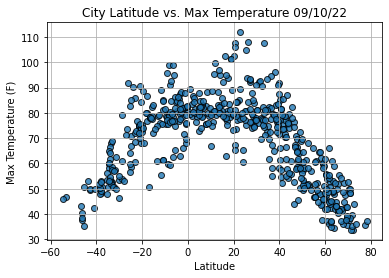

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

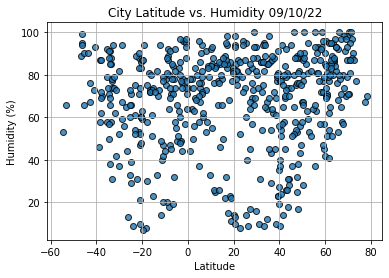

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

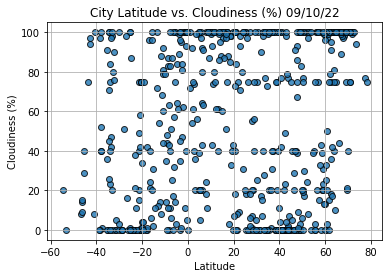

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

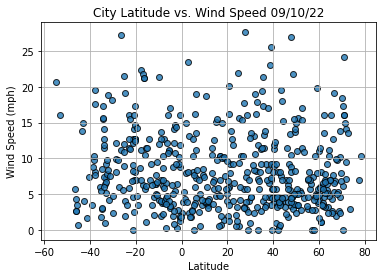

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    #I added this to check r-Values, it wasn't part of the given code
    print(r_value)

In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

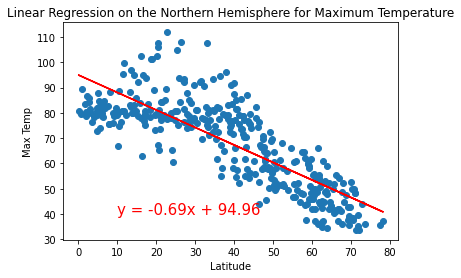

-0.8072702076660613


In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

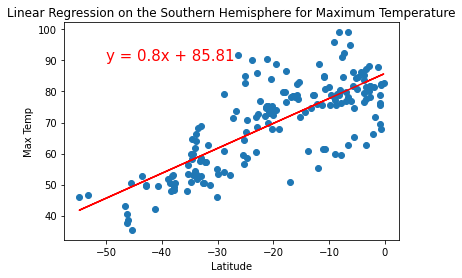

0.7670116062946628


In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

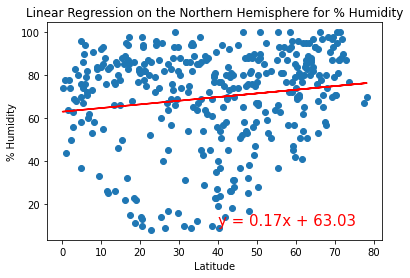

0.15086124803496073


In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

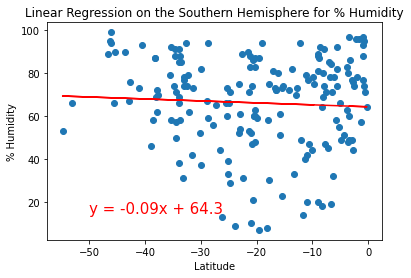

-0.05635991981476508


In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

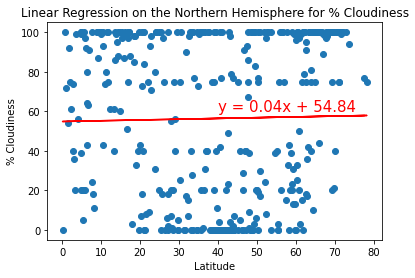

0.01963437861562695


In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,60))

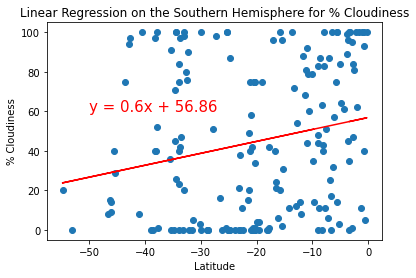

0.21005852323202584


In [40]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

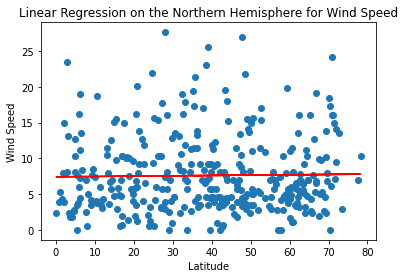

0.017955863792028164


In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

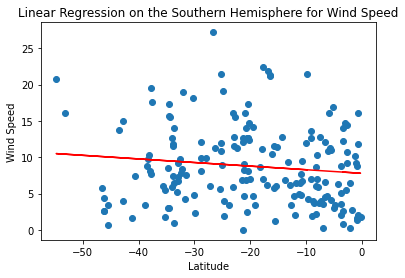

-0.12112187671868449


In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))